In [2]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("../Datasets/alturas.csv")

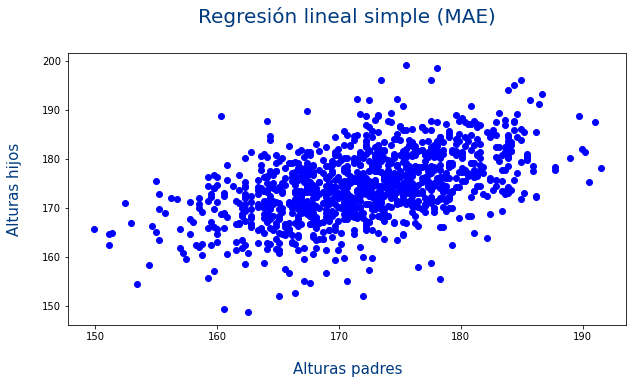

In [19]:
figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()

# Las etiquetas
axis.set_xlabel('Alturas padres', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Alturas hijos', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Regresión lineal simple (MAE)", fontsize=20,pad=30,color="#003B80")


# Los datos que se muestran
axis.plot(df.Father, df.Son,"o",color="#0000FF", zorder = 1)


Coeficientes: 
 [1.07326769]
Término independiente (corte de la recta en eje Y): 
 [0.22416673]


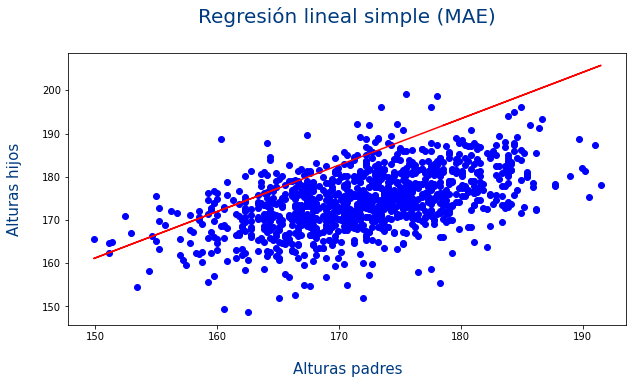

In [4]:
from sklearn.linear_model import SGDRegressor
import numpy as np

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
# Los inputs deben ser arrays de numpy o parecido reshape???
# print(df.Father)
X = np.array(df.Father).reshape((-1, 1))
# print(X)
Y = np.array(df.Son)
# print(Y)
# Parece ser que no se puede usar LinearRegression con métrica MAE
# Podemos usar SGDRegressor con loss = "epsilon_insensitive" y epsilon = 0 para lograrlo

modelo = SGDRegressor(loss = "epsilon_insensitive", epsilon = 0.0)
modelo.fit(X, Y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término independiente (corte de la recta en eje Y): \n', modelo.intercept_)

figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()

# Las etiquetas
axis.set_xlabel('Alturas padres', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Alturas hijos', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Regresión lineal simple (MAE)", fontsize=20,pad=30,color="#003B80")

# X = df.Father
Y = df.Father.apply(lambda x: modelo.predict(np.array(x).reshape(-1, 1)))

# Los datos que se muestran
axis.plot(df.Father, df.Son,"o",color = "#0000FF", zorder = 1)
# axis.plot(df.Father, modelo.predict(X), color = "#FF0000", zorder = 2)
axis.plot(df.Father, Y, color = "#FF0000", zorder = 2)


                         QuantReg Regression Results                          
Dep. Variable:                    Son   Pseudo R-squared:               0.1357
Model:                       QuantReg   Bandwidth:                       2.858
Method:                 Least Squares   Sparsity:                        14.72
Date:                Fri, 14 May 2021   No. Observations:                 1078
Time:                        11:41:56   Df Residuals:                     1076
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.3832      5.533     16.515      0.000      80.526     102.240
Father         0.4824      0.032     15.000      0.000       0.419       0.545

The condition number is large, 4.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


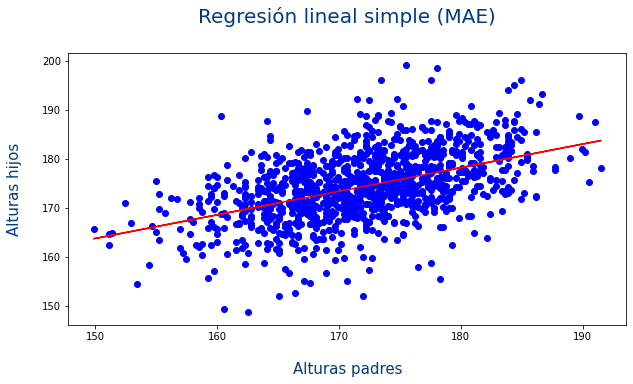

In [5]:
import statsmodels.formula.api as smf

mod = smf.quantreg('Son ~ Father', df)
res = mod.fit(q=.5)
print(res.summary())

ols = dict(a = res.params['Intercept'],
           b = res.params['Father'])
print(ols)


get_y = lambda a, b: a + b * X

y = get_y(ols['a'], ols['b'])
print(y)

figure=plt.figure(figsize=(10, 5))
axis = figure.add_subplot()

# Las etiquetas
axis.set_xlabel('Alturas padres', fontsize=15,labelpad=20,color="#003B80")  
axis.set_ylabel('Alturas hijos', fontsize=15,labelpad=20,color="#003B80")
axis.set_title("Regresión lineal simple (MAE)", fontsize=20,pad=30,color="#003B80")

# Los datos que se muestran
axis.plot(df.Father, df.Son,"o",color = "#0000FF", zorder = 1)
# axis.plot(df.Father, modelo.predict(X), color = "#FF0000", zorder = 2)
axis.plot(X, y, color = "#FF0000", zorder = 2)
